<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.859 · Visualización de datos aula 2</p>
<p style="margin: 0; text-align:right;">2020-2 · Máster universitario en Ciencia de datos (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
    <p style="margin: 0; text-align:right; padding-button: 100px;">Nombre: Adonis González Godoy</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

# EDA Dataset Tobacco



## 1. Título

__Medidas de control aplicadas sobre el tabaquismo en diferentes países y regiones__

## 2. Descripción de los datos seleccionados

El dataset ha sido seleccionado de la página oficial de la Organización Mundial de la Salud. La información se refiere al Tabaquismo en el año 2016 y hace un seguimiento de la situación en diferentes países y regiones que han aplicado políticas de control del tabaco que van desde advertencias gráficas y prohibiciones de publicidades hasta zonas de no fumadores.

Los datos se han recopilado para intentar mejorar el bienestar de las personas y reducir los riegos de la salud asociados al consumo de tabaco, contribuyendo así a mejorar la salud de la población.
El tabaquismo es un trastorno crónico en que la persona presenta una adicción física como psicológica al consumo de tabaco. El consumo de tabaco es uno de los principales factores de riesgo carcinógeno y otras enfermedades pulmonares. Además de ser altamente adictivo, la nicótica es la droga responsable en primer lugar de la adicción de una persona, esta adicción es semejase a la adicción producida por el uso de drogas como la heroína y la cocaína.
No se ha tenido en cuanto la perspectiva de género ya que el colectivo es específico.


Link de la fuente del dataset:
https://www.who.int/tobacco/global_report/2013/full_dataset/en/

## 3. Los datos

Cargamos las librerias necesarias.

In [1]:
import matplotlib.pyplot as plt
from seaborn import boxplot
import seaborn as sns
import pandas as pd
import numpy as np 
import pycountry
import os

import warnings
warnings.filterwarnings("ignore")

Cargamos el conjunto de datos.

In [6]:
ROOT_DIR = os.path.abspath("../")
DATA_DIR = os.path.join(ROOT_DIR, "data")
data_file = os.path.join(DATA_DIR, "RGTE17_CoreDataSet.xls")

In [7]:
data_xlsx = pd.ExcelFile(data_file)

El conjunto de datos lo pasaremos a pandas dataframe

In [8]:
sheet_names = data_xlsx.sheet_names
df = data_xlsx.parse(sheet_names[0])

Tenemos un primer contacto con el dataset, mostramos las 2 primeras filas

In [10]:
df.head(10)

,Region,Country,ISO_3_Country_Code,M_Group_16,P_Group_16,O_Group_16,W_Group_16,W-MM_Group_16,E_Group_16,R_Group_16,...,R_Other_estimate_16,R_total_tax_estimate_16,R_excise_incr_16,R_afford_gdp_%_16,NTCP_govt_obj_16,NTCP_agcy_16,NTCP_FTE_16,NTCP_govt_exp_16,NTCP_curr_16,NTCP_budget_year_16
0,AFR,Algeria,DZA,2,3,3,2,1,4,3,...,0,0.4306,Yes,0.0313,Yes,Yes,2,324753406,DZD,2010
1,AFR,Angola,AGO,1,3,3,2,2,2,1,...,. . .,. . .,No,. . .,Yes,Yes,. . .,. . .,. . .,. . .
2,AFR,Benin,BEN,2,4,4,3,1,4,2,...,0.0069,0.0642,No,0.1094,Yes,Yes,3,. . .,. . .,. . .
3,AFR,Botswana,BWA,2,2,3,2,2,4,3,...,0,0.4972,Yes,0.0439,Yes,Yes,3,. . .,. . .,. . .
4,AFR,Burkina Faso,BFA,2,5,3,5,2,4,3,...,0,0.3481,Yes,0.1698,Yes,Yes,6,5400000,XOF,2005
5,AFR,Burundi,BDI,1,2,2,2,1,2,3,...,0,0.4275,No,0.2973,Yes,Yes,13,12500000,BIF,2012
6,AFR,Cabo Verde,CPV,4,2,4,2,2,4,2,...,0.0031,0.2384,No,0.0587,Yes,Yes,1.5,1571625,CVE,2005
7,AFR,Cameroon,CMR,3,3,4,4,5,4,2,...,0.0157,0.2131,No,0.0681,Yes,Yes,9,25000000,XAF,2008
8,AFR,Central African Republic,CAF,1,2,3,2,1,2,1,...,. . .,. . .,No,. . .,Yes,Yes,2,8400000,XAF,2005
9,AFR,Chad,TCD,1,5,3,5,1,5,3,...,0.0283,0.3447,Yes,0.1485,Yes,Yes,10,122500000,FCFA,2015


In [11]:
df.shape

(195, 173)

Como se puede ver la dimensión del dataset es de 195 filas x 173 columnas. Es un dataset extenso y disponible para aplicar diferentes técnicas de análisis.

A continuación se analizará la estructura y resumen de datos, de esta forma se entenderá mejor el dataset.

In [13]:
df.describe()

,M_Group_16,P_Group_16,O_Group_16,W_Group_16,W-MM_Group_16,E_Group_16,P_count_places_sf_16
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,2.800000,3.276923,3.774359,3.702564,2.687179,3.661538,4.051282
std,1.142434,1.294409,0.793244,1.245091,1.450059,1.064085,3.174875
min,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,0.000000
25%,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,0.500000
50%,3.000000,3.000000,4.000000,4.000000,2.000000,4.000000,4.000000
75%,4.000000,5.000000,4.000000,5.000000,4.000000,4.000000,8.000000
max,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,8.000000


In [14]:
for key,value in df.dtypes.iteritems():
        print(key," -->",value)

Region  --> object
Country  --> object
ISO_3_Country_Code  --> object
M_Group_16  --> int64
P_Group_16  --> int64
O_Group_16  --> int64
W_Group_16  --> int64
W-MM_Group_16  --> int64
E_Group_16  --> int64
R_Group_16  --> object
P1_healthcare_16  --> object
P2_education_16  --> object
P3_universities_16  --> object
P4_govt_16  --> object
P5_indoor_off_16  --> object
P6_restaurants_16  --> object
P7_pubs_16  --> object
P8_pub_transp_16  --> object
P9_all_other_16  --> object
P_count_places_sf_16  --> int64
P11_fines_any_16  --> object
P12_fines_establishment_16  --> object
P13_fines_smoker_16  --> object
P14_funds_for_enforce_16  --> object
P15_complaints_16  --> object
P10_subnat_auth_exists_16  --> object
P16_subnat_complete_bans_exist  --> object
O_Quitline_16  --> object
O_Avail_hlth_clin_16  --> object
O_Avail_hosp_16  --> object
O_Avail_off_hlth_prof_16  --> object
O_Avail_community_16  --> object
O_Avail_other_16  --> object
O_Ins_hlth clin_16  --> object
O_Ins_hosp_16  --> object

Como se puede observar la mayoría de datos son de tipo object, por lo general las columnas con tipo de datos object son de tipo String.

### Descripción de variables

###  Exploración de los datos

Miraremos si el dataset contiene campos con valores nulos.

In [16]:
for key,value in df.isnull().sum().iteritems():
    if value > 0:
        print(key," -->",value)

P10_subnat_auth_exists_16  --> 9
E20_subnational_exists_16  --> 8
NTCP_curr_16  --> 1


In [17]:
print(df.isnull().values.sum())
print(df.isna().values.sum())

18
18


<AxesSubplot:>

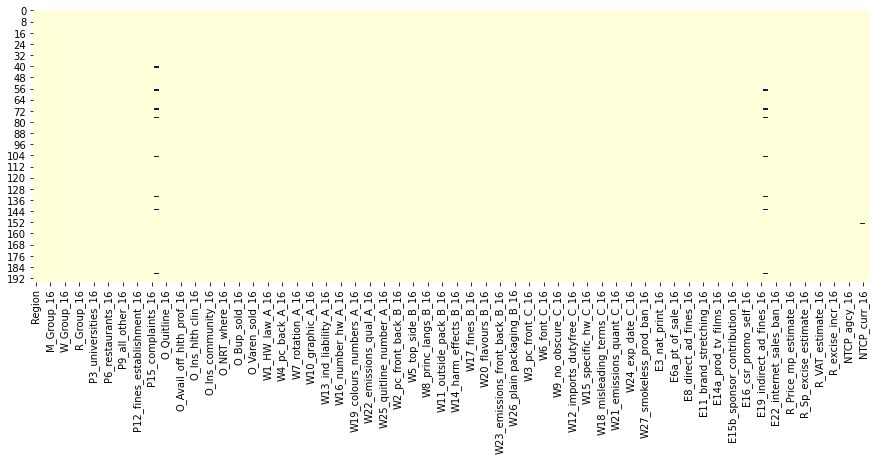

In [19]:
fig, ax = plt.subplots(figsize=(15,5))
sns.heatmap(df.isnull(), cbar=False, vmin=0, vmax=0.7, cmap="YlGnBu", ax=ax)